In [1]:
#import library
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression 

In [2]:
#read the CSV file using library
data = pd.read_csv("C:/Users/Admin/Desktop/Google Play Store Analysis/Google Play Store Apps Dataset/googleplaystore.csv")

In [3]:
#fetch first 5 data
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite - FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Checking the data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


## Data Preprocessing

In [6]:
data['Installs'] = data.Installs.apply(lambda x: int(x.replace('+','').replace(',','')))

In [7]:
data.Installs.value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1009
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              69
1000000000      58
50              56
5                9
1                3
Name: Installs, dtype: int64

In [8]:
data['Content Rating'].value_counts()

Everyone           7414
Teen               1084
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [9]:
data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [10]:
data["Size"] = [ float(i.split('M')[0]) if 'M' in i else float(0) for i in data["Size"]  ]

In [11]:
data["Size"] = 1000 * data["Size"]

In [12]:
data.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [13]:
data['Type'] = data['Type'].map({'Free' : 1, 'Paid': 0})

In [14]:
data.drop(['Android Ver', 'Current Ver', 'Last Updated', 'App'], axis=1, inplace=True)

In [15]:
data.describe(include='all')

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,9360,9360.000000,9360,9360.000000,9.360000e+03,9360.000000,9360,9360,9360
unique,33,NaN,5990,NaN,NaN,NaN,73,6,115
top,FAMILY,NaN,2,NaN,NaN,NaN,0,Everyone,Tools
freq,1746,NaN,83,NaN,NaN,NaN,8715,7414,732
mean,NaN,4.191838,NaN,18941.239316,1.790875e+07,0.931090,NaN,NaN,NaN
std,NaN,0.515263,NaN,23028.129251,9.126637e+07,0.253315,NaN,NaN,NaN
min,NaN,1.000000,NaN,0.000000,1.000000e+00,0.000000,NaN,NaN,NaN
25%,NaN,4.000000,NaN,2400.000000,1.000000e+04,1.000000,NaN,NaN,NaN
50%,NaN,4.300000,NaN,9500.000000,5.000000e+05,1.000000,NaN,NaN,NaN
75%,NaN,4.500000,NaN,27000.000000,5.000000e+06,1.000000,NaN,NaN,NaN


In [16]:
data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [17]:
data['Price'] = [ float(i.split('$')[1]) 
                 if '$' in i 
                 else float(0) 
                 for i in data['Price'] ]

In [18]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19000.0,10000,1,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14000.0,500000,1,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,1,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,1,0.0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2800.0,100000,1,0.0,Everyone,Art & Design;Creativity


In [19]:
data.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [20]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [21]:
data.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [22]:
data['Reviews'] = data.Reviews.astype(int)

In [23]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [24]:
data.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [25]:
data.dtypes

Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type                int64
Price             float64
Content Rating     object
Genres             object
dtype: object

In [26]:
data = pd.get_dummies(data)

In [27]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,159,19000.0,10000,1,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000.0,500000,1,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700.0,5000000,1,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000.0,50000000,1,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800.0,100000,1,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
def Evaluate_mse_mae (y_true, y_predict):
    evaluate = {}
    evaluate['Mean Squared Error'] = metrics.mean_squared_error(y_true,y_predict)
    evaluate['Mean Absolute Error'] = metrics.mean_absolute_error(y_true,y_predict)
    return evaluate

{'Mean Squared Error': 0.2728811189454127, 'Mean Absolute Error': 0.36398590208265236}


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


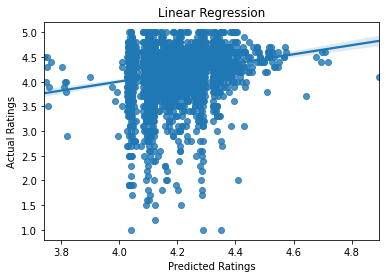

In [30]:
# Linear Regression

X = data.drop('Rating', axis = 1)
y = data.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model = LinearRegression()

model.fit(X_train,y_train)

results = model.predict(X_test)
print(Evaluate_mse_mae(y_test,results))

sns.regplot(results,y_test)

plt.title('Linear Regression')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [31]:
print ('Actual mean :' + str(y.mean()))
print ('Prediction(mean) :' + str(results.mean()))
print ('Prediction(std) :'+ str(results.std()))

Actual mean :4.191837606837612
Prediction(mean) :4.191469687697875
Prediction(std) :0.11481946963420324


{'Mean Squared Error': 0.2249339053490028, 'Mean Absolute Error': 0.30577866809116805}


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


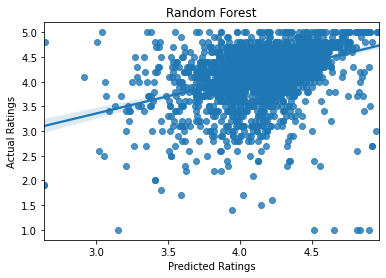

In [32]:
# Random Forest

X = data.drop('Rating', axis = 1)
y = data.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
results = model.predict(X_test)
print(Evaluate_mse_mae(y_test,results))

sns.regplot(results,y_test)
plt.title('Random Forest')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [33]:
print ('Actual mean :' + str(y.mean()))
print ('Prediction(mean) :' + str(results.mean()))
print ('Prediction(std) :'+ str(results.std()))

Actual mean :4.191837606837612
Prediction(mean) :4.193641274928774
Prediction(std) :0.2924092130737288


In [34]:
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = data.drop('Rating', axis = 1)
y = data.Rating

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train_scaled, y_train)
knn_pred = neigh.predict(X_test_scaled)
r2_score(y_test, knn_pred)

-0.6866831432074203

In [35]:
mean_squared_error(y_test, knn_pred)

0.45320868945868953

Text(0.5, 0, 'Prediction')

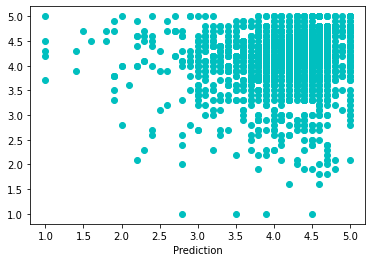

In [36]:
plt.scatter(x=y_test,y=knn_pred,color='c')
plt.xlabel("Prediction")